In [ ]:
import numpy as np
import math
import csv
def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)
class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    def __str__(self):
        return self.attribute
def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)

    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1

    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)

    return items, dict
def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0

    counts = np.zeros((items.shape[0], 1))
    sums = 0

    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)

    for count in counts:
        sums += -1 * count * math.log(count, 2)
    return sums
def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False)

    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))

    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)

    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)

    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]

    return total_entropy / iv
def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node

    gains = np.zeros((data.shape[1] - 1, 1))

    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)

    split = np.argmax(gains)

    node = Node(metadata[split])
    metadata = np.delete(metadata, split, 0)

    items, dict = subtables(data, split, delete=True)

    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))

    return node
def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)
metadata, traindata = read_data("data3.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

 Outlook
    Overcast
       b'Yes'
    Rain
       Wind
          b'Strong'
             b'No'
          b'Weak'
             b'Yes'
    Sunny
       Humidity
          b'High'
             b'No'
          b'Normal'
             b'Yes'


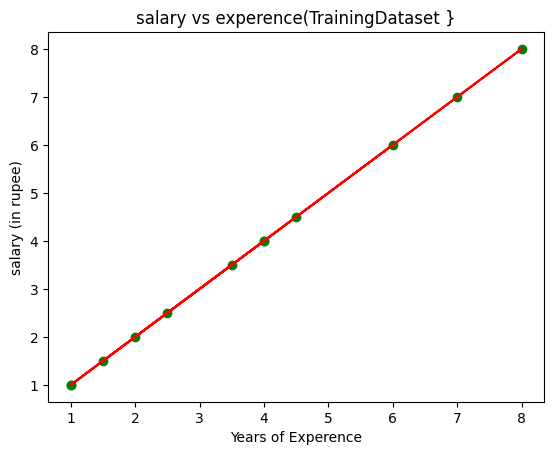

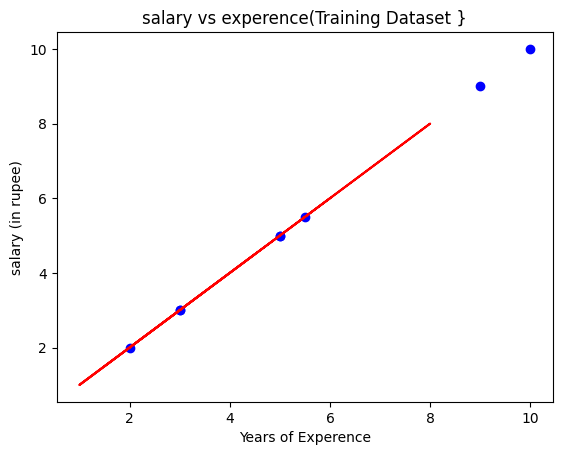

In [ ]:
# 4(A)-LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data_set=pd.read_csv(r'salary.csv')
#print(data_set)
x=data_set.iloc[:,:-1].values
y=data_set.iloc[:,:-1].values
x_train , x_test ,y_train , y_test=train_test_split(x,y,test_size=1/3
,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)
mtp.scatter(x_train,y_train,color="green")
mtp.plot(x_train,x_pred,color="red")
mtp.title("salary vs experence(TrainingDataset }")
mtp.xlabel("Years of Experence")
mtp.ylabel("salary (in rupee)")
mtp.show()
mtp.scatter(x_test,y_test,color="blue")
mtp.plot(x_train,x_pred,color="red")
mtp.title("salary vs experence(Training Dataset }")
mtp.xlabel("Years of Experence")
mtp.ylabel("salary (in rupee)")
mtp.show()

<ipython-input-3-a0c22ed845b3>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


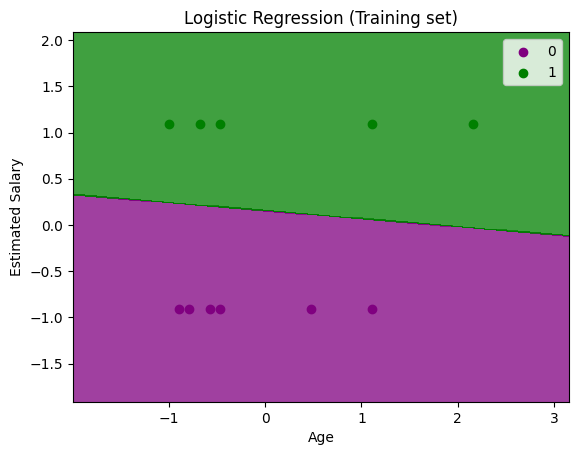

<ipython-input-3-a0c22ed845b3>:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


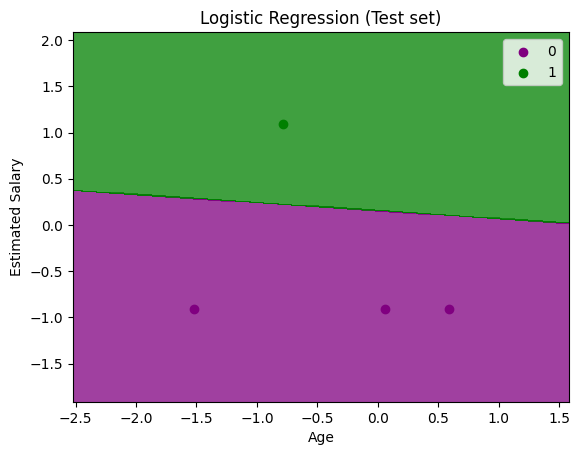

In [ ]:
#4(B) - Logistic Regression
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
data_set= pd.read_csv('user_data.csv')
x=data_set.iloc[:,[3,4]].values
y=data_set.iloc[0:,4].values
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=0)
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,
fit_intercept=True,
              intercept_scaling=1, l1_ratio=None, max_iter=100,
              multi_class='warn', n_jobs=None, penalty='l2',
              random_state=0, solver='warn', tol=0.0001, verbose=0,
              warm_start=False)
y_pred= classifier.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop =x_set[:, 0].max() + 1, step =0.01),nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1,step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Logistic Regression (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop =
x_set[:, 0].max() + 1, step =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1,
step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Logistic Regression (Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

In [6]:
import sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
print(preds)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, preds))


['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]
0.9414893617021277


True Positive(TP) =  86
False Positive(FP) =  2
True Negative(TN) =  51
False Negative(FN) =  4
Accuracy of the binary classifier = 0.958


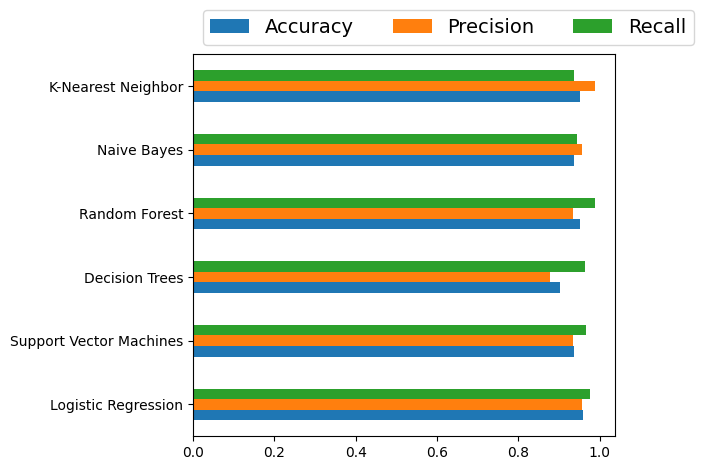

In [ ]:
#Experiment-4(C):- Binary Classifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer(as_frame=True)
dataset['data'].head()
dataset['target'].head()
dataset['target'].value_counts()
X = dataset['data']
y = dataset['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,
test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)
accuracy = (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
models = {}
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score,recall_score
accuracy, precision, recall = {}, {}, {}
for key in models.keys():
  models[key].fit(X_train, y_train)
  predictions = models[key].predict(X_test)
  accuracy[key] = accuracy_score(predictions, y_test)
  precision[key] = precision_score(predictions, y_test)
  recall[key] = recall_score(predictions, y_test)
  import pandas as pd
df_model = pd.DataFrame(index=models.keys(),
columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()